In [25]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting
import matplotlib.cm as cm
import scipy as sp
from sklearn.cluster import KMeans as km
from sklearn.metrics import silhouette_score


np.random.seed(42) 

3. Import of the .csv file

In [26]:
df = pd.read_csv('air_traffic.csv')
df

,is_more_than_100_passengers?,is_after_2010?,is_summer?,is_winter?,is_spring?,is_authmn?,alaska_airlines?,delta_air_lines?,skywest_airlines?,united_airlines?,virgin_america?,other_airline?,is_from_america?,is_international_airline?,is_lowcost?,is_departing?
0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0
1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1
2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0
3,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0
4,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1
15003,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0
15004,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1
15005,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


5. Num cases:

In [27]:
print("num rows: "+str(df.shape[0]))

num rows: 15007


6. Num features:

In [28]:
print("num cols: "+str(df.shape[1]))

num cols: 16


7. The data points are represented as binary values. For each instance, the feature x is either 0 - not the feature, or 1 - the feature.

In [29]:
X=df
print(X.shape)
print(type(X))
X=X.to_numpy()
type(X)


(15007, 16)
<class 'pandas.core.frame.DataFrame'>


numpy.ndarray

Build the model using KMeans and fit_predict()

In [30]:
def get_clusterer(points, k):
    clusterer = km(n_clusters=k, n_init=10)
    preds = clusterer.fit_predict(points)
    return clusterer, preds


distance_metric = 'euclidean'
K = 11
k_range = np.arange(2, K, 1)
clusterer, preds = get_clusterer(df, K)


Function show_results() allows to see each cluster's location on a graph

In [31]:
# Define a function that will show the model's results numerically and visually
def show_results (clusterer):
    centers = clusterer.cluster_centers_
    plt.figure(figsize=(3,2))
    for i in range(len(clusterer.cluster_centers_)):
        plt.plot(centers[i,:])
    plt.show()

Function calc_silhouette() calculates the model's silhouette

In [32]:
# Define a function that will show the model's silhouette
def calc_silhouette(df, preds):
    sil = silhouette_score(df, preds, metric = distance_metric)
    return sil

8. We run some models to find the best available K

for  2  clusters:


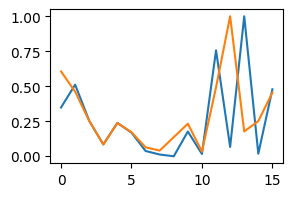

for  3  clusters:


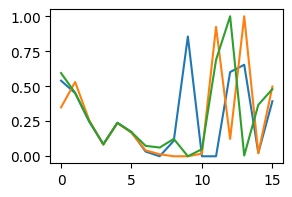

for  4  clusters:


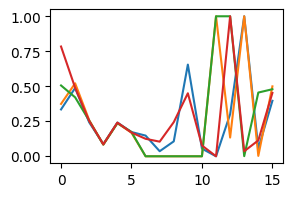

for  5  clusters:


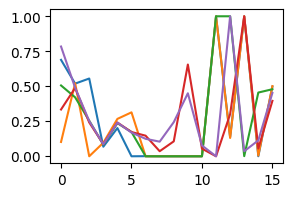

for  6  clusters:


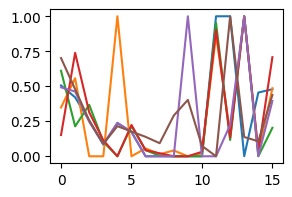

for  7  clusters:


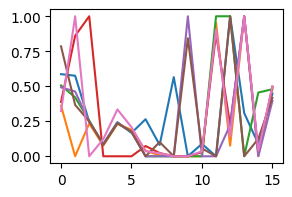

for  8  clusters:


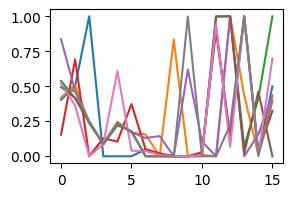

for  9  clusters:


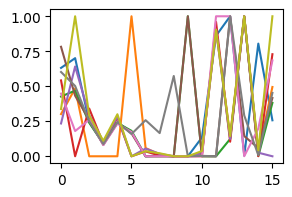

for  10  clusters:


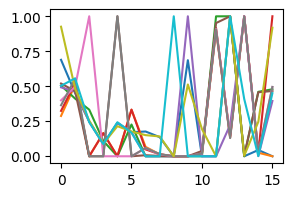

[0.17990106018375795,
 0.18647688779045277,
 0.1855799826267907,
 0.13440744804998575,
 0.14311937028874291,
 0.15576344572845294,
 0.15506706936277498,
 0.15519408422438993,
 0.17286829105835078]

In [33]:
silhouettes_by_k = []
for clusters in k_range:
    clusterer, preds = get_clusterer(X, clusters)
    print("for ", clusters, " clusters:")
    silhouettes_by_k.append(calc_silhouette(df, preds))
    show_results(clusterer)
silhouettes_by_k

We want to visuallize the best silhouettes using a graph:

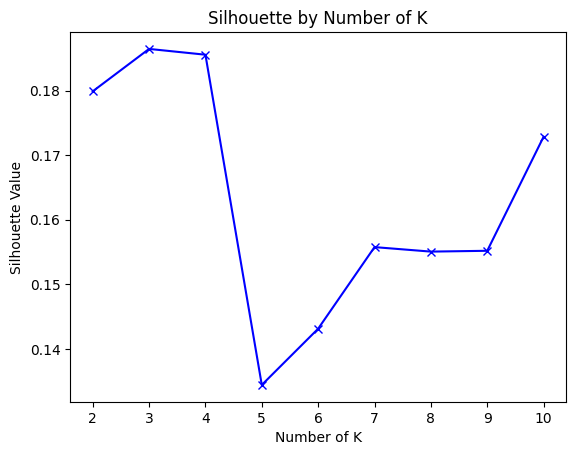

In [34]:
# Define a function that will show visually for each K its silouette
def show_silhouettes (silhouettes_by_k):
    plt.plot(k_range, silhouettes_by_k, 'bx-')
    plt.title('Silhouette by Number of K')
    plt.xlabel('Number of K')
    plt.ylabel('Silhouette Value')
    plt.xticks(k_range)
plt.show()
    
# Call the function
show_silhouettes (silhouettes_by_k)

We can see by the graph that K=3 is best for our purposes. Over that we get little deminishing returns (and no gurrantee for betterment).

9. We will rebuild the clusterer for k=3 (best found) and print the prediction clusters for the first and last 3 instances.

In [35]:
best_k = 3
clusterer, preds = get_clusterer(X, best_k)
print(preds)

[2 2 2 ... 1 1 1]


10. We will analize the clusters one by one to learn about the main characteristics

Cluster #1:
We can see that these are summer/spring (almost no winter), united airlines, usually from america and international, not lowcost.

In [36]:
df['cluster']=clusterer.labels_
df[df['cluster']==0].describe()

,is_more_than_100_passengers?,is_after_2010?,is_summer?,is_winter?,is_spring?,is_authmn?,alaska_airlines?,delta_air_lines?,skywest_airlines?,united_airlines?,virgin_america?,other_airline?,is_from_america?,is_international_airline?,is_lowcost?,is_departing?,cluster
count,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.0,3560.000000,3560.000000,3560.0,3560.0,3560.000000,3560.000000,3560.000000,3560.000000,3560.0
mean,0.539888,0.451404,0.247472,0.086517,0.239888,0.173315,0.033708,0.0,0.110674,0.855618,0.0,0.0,0.601685,0.653652,0.024438,0.393258,0.0
std,0.498476,0.497703,0.431604,0.281165,0.427075,0.378572,0.180502,0.0,0.313772,0.351526,0.0,0.0,0.489620,0.475873,0.154427,0.488542,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.0
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,1.000000,1.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0


Cluster #2:
Mostly >100 passengers, summer/spring (almost no winter), other airlines, from america only and local flight.

In [37]:
df['cluster']=clusterer.labels_
df[df['cluster']==1].describe()

,is_more_than_100_passengers?,is_after_2010?,is_summer?,is_winter?,is_spring?,is_authmn?,alaska_airlines?,delta_air_lines?,skywest_airlines?,united_airlines?,virgin_america?,other_airline?,is_from_america?,is_international_airline?,is_lowcost?,is_departing?,cluster
count,6858.000000,6858.000000,6858.000000,6858.000000,6858.000000,6858.000000,6858.000000,6858.000000,6858.0,6858.0,6858.000000,6858.000000,6858.000000,6858.0,6858.000000,6858.000000,6858.0
mean,0.349081,0.530621,0.256926,0.083260,0.237387,0.167833,0.042141,0.014582,0.0,0.0,0.018810,0.924468,0.123651,1.0,0.021289,0.497813,1.0
std,0.476714,0.499098,0.436970,0.276296,0.425512,0.373745,0.200924,0.119879,0.0,0.0,0.135864,0.264267,0.329207,0.0,0.144357,0.500032,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.0
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0


Cluster #3:
summer/spring (almost no winter), other airlines, not from america, international only, non-lowcost

In [38]:
df['cluster']=clusterer.labels_
df[df['cluster']==2].describe()
print()

11. We now have pretty good clustering, and can use it to derive bussiness ideas. 
We can now check for each passenger we have in the airline database to fit into which one of the 3 clusters.
Then we can offer each passenger value packages/vouchers/discounts according to its usuall behavior and type of cluster.